In [39]:
from ds_utils.imports import *

In [40]:
from imp import reload
import ds_utils.misc; reload(ds_utils.misc)

<module 'ds_utils.misc' from '/tmp/ds-utils/ds_utils/misc.py'>

### Regular model using all training data

In [41]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [42]:
# see https://github.com/yang-zhang/code-data-science/blob/master/numpy_newaxis.ipynb
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [43]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 1, 28, 28), (60000, 10), (10000, 1, 28, 28), (10000, 10))

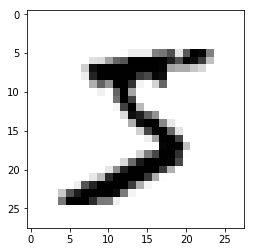

In [45]:
ds_utils.misc.imshow_gray(X_train[0][0])

In [46]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [47]:
model = keras.models.Sequential([
    keras.layers.Convolution2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(1, 28, 28)),
    keras.layers.Convolution2D(
        filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [48]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
29504/60000 [=============>................] - ETA: 346s - loss: 1.9100 - acc: 0.8090 

### Suppose we only have a smaller training set (half the orginal size).

In [9]:
train_small = np.random.choice(range(X_train.shape[0]), int(X_train.shape[0]/2))

In [10]:
X_train_small, y_train_small = X_train[train_small], y_train[train_small]

In [11]:
X_train_small.shape, y_train_small.shape, X_test.shape, y_test.shape

((30000, 1, 28, 28), (30000, 10), (10000, 1, 28, 28), (10000, 10))

In [12]:
model.fit(X_train_small, y_train_small, validation_data=[X_test, y_test], epochs=2)

Train on 30000 samples, validate on 10000 samples
Epoch 1/2
30000/30000 [==============================] - 293s - loss: 14.5208 - acc: 0.0991 - val_loss: 14.4547 - val_acc: 0.1032

In [13]:
model.save_weights('models/pseudo_labeling_weights.h5')

In [14]:
X_pseudo = X_test
y_pseudo = model.predict(X_test)

In [15]:
X_comb_pseudo = np.concatenate([X_train, X_pseudo])
y_comb_pseudo = np.concatenate([y_train, y_pseudo])

In [16]:
model.load_weights('models/pseudo_labeling_weights.h5')

In [17]:
model.fit(X_comb_pseudo, y_comb_pseudo, validation_data=[X_test, y_test], epochs=2)

Train on 70000 samples, validate on 10000 samples
Epoch 1/2
70000/70000 [==============================] - 618s - loss: 12.4464 - acc: 0.2278 - val_loss: 14.4547 - val_acc: 0.1032

Ref: 
- https://github.com/yang-zhang/deep-learning/blob/master/MNIST_keras.ipynb
- https://github.com/yang-zhang/courses/blob/master/deeplearning1/nbs/statefarm.ipynb